In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
cv2.__version__

'4.1.2'

In [4]:
net = cv2.dnn.readNetFromTensorflow("/Users/sid/Downloads/frozen_mobile.pb")

In [5]:
frame = cv2.imread("/Users/sid/Downloads/Football vs Baseball/Football vs Baseball/images/Test/Football/tn_10_american-football-1344616591.jpg")

In [6]:
frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2RGB)

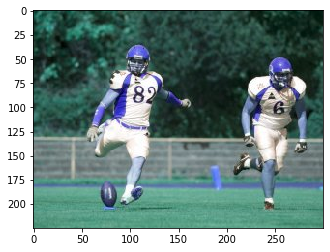

In [7]:
plt.imshow(frame)

In [8]:
blob = cv2.dnn.blobFromImage(frame, 1/255, (224, 224), [0,0,0], 1, crop = False)

In [9]:
blob.shape

(1, 3, 224, 224)

In [10]:
def getOutputsNames(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [11]:
getOutputsNames(net)

['avg_pool/Mean/flatten', 'dense_2/Softmax']

In [12]:
net.setInput(blob)
outs = net.forward (getOutputsNames(net))

In [14]:
outs[1]

array([[0.59166056, 0.40833947]], dtype=float32)

In [15]:
np.argmax(outs[1])

0

In [16]:
Guess = []
d = []
for i in os.listdir("/Users/sid/Downloads/Football vs Baseball/Football vs Baseball/images/Test/Football"):
    frame = cv2.imread("/Users/sid/Downloads/Football vs Baseball/Football vs Baseball/images/Test/Football/"+i)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2RGB)
    blob = cv2.dnn.blobFromImage(frame, 1/255, (224, 224), [0,0,0], 1, crop = False)
    net.setInput(blob)
    outs = net.forward (getOutputsNames(net))
    Guess.append(np.argmax(outs[1]))
    d.append(i)

In [17]:
Guess

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]

In [65]:
d[19]

'tn_10_american-football-1344616591.jpg'

In [18]:
Guess = []
for i in os.listdir("/Users/sid/Downloads/Football vs Baseball/Football vs Baseball/images/Test/Baseball"):
    frame = cv2.imread("/Users/sid/Downloads/Football vs Baseball/Football vs Baseball/images/Test/Baseball/"+i)
    frame = cv2.cvtColor(frame, cv2.COLOR_RGBA2RGB)
    blob = cv2.dnn.blobFromImage(frame, 1/255, (224, 224), [0,0,0], 1, crop = False)
    net.setInput(blob)
    outs = net.forward (getOutputsNames(net))
    Guess.append(np.argmax(outs[1]))

In [19]:
Guess

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [75]:
cv2.min

<module 'cv2.cv2' from '/Users/sid/opt/anaconda3/lib/python3.7/site-packages/cv2/cv2.cpython-37m-darwin.so'>